In [ ]:
!nvidia-smi

Sun May 26 04:30:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

dataset_path = '/content/drive/My Drive/dataset'

os.chdir(dataset_path)

HOME = os.getcwd()
print("Current working directory:", HOME)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current working directory: /content/drive/My Drive/dataset


In [ ]:
# import shutil
# import os

# source_path = '/content/klasifikasi-pepaya-2-1'
# destination_path = '/content/drive/My Drive/dataset/klasifikasi-pepaya-2-1'

# shutil.move(source_path, destination_path)

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.134

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.9/78.2 GB disk)


In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="aYqiHc65lSXIZG2DzoWr")
project = rf.workspace("ngguashim").project("pepaya-classification")
version = project.version(2)
dataset = version.download("folder")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Pepaya-Classification-🚀-2 in folder:: 100%|██████████| 1208/1208 [00:09<00:00, 126.82it/s]


In [ ]:
%cd {HOME}
!yolo task=classify mode=train model=yolov8n-cls.pt data={dataset.location} epochs=100 imgsz=128

/content/drive/My Drive/dataset
Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/drive/MyDrive/dataset/Pepaya-Classification-🚀-2, epochs=100, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sav

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

dataset_path = '/content/drive/My Drive/dataset'

os.chdir(dataset_path)

HOME = os.getcwd()
print("Current working directory:", HOME)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current working directory: /content/drive/My Drive/dataset


In [ ]:
!ls -la "{HOME}/runs/classify/train2/"

total 920
-rw------- 1 root root   1584 May 26 04:46 args.yaml
-rw------- 1 root root  81118 May 26 05:14 confusion_matrix_normalized.png
-rw------- 1 root root  74889 May 26 05:14 confusion_matrix.png
-rw------- 1 root root 155002 May 26 05:14 events.out.tfevents.1716698815.5fb4fcbb02d5.8677.0
-rw------- 1 root root  19392 May 26 05:14 results.csv
-rw------- 1 root root  55538 May 26 05:14 results.png
-rw------- 1 root root  55942 May 26 04:47 train_batch0.jpg
-rw------- 1 root root  52968 May 26 04:47 train_batch1.jpg
-rw------- 1 root root  53978 May 26 04:47 train_batch2.jpg
-rw------- 1 root root  54585 May 26 05:11 train_batch5940.jpg
-rw------- 1 root root  57156 May 26 05:11 train_batch5941.jpg
-rw------- 1 root root  55215 May 26 05:11 train_batch5942.jpg
-rw------- 1 root root  56732 May 26 05:14 val_batch0_labels.jpg
-rw------- 1 root root  56732 May 26 05:14 val_batch0_pred.jpg
-rw------- 1 root root  51537 May 26 05:14 val_batch1_labels.jpg
-rw------- 1 root root  51537 Ma

In [ ]:
!cat "{HOME}/runs/classify/train2/results.csv" | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                      0,                      1,                      1,                      0,             0.00023439,             0.00023439,             0.00023439
                      2,                      0,                      1,                      1,                      0,             0.00046772,             0.00046772,             0.00046772
                      3,                      0,                      1,                      1,                      0,             0.00069633,             0.00069633,             0.00069633
                      4,                      0,                      1,                      1,                      0,             0.00069279,             0.00069279,             0.00069279
                      5,                

In [ ]:
# Change to the working directory
%cd "{HOME}"

# Run YOLOv8 classification validation
!yolo task=classify mode=val model="{HOME}/runs/classify/train2/weights/best.pt" data="{HOME}/yolov8n-cls.yaml"

/content/drive/My Drive/dataset
Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1436161 parameters, 0 gradients, 3.3 GFLOPs
100% 755k/755k [00:00<00:00, 14.7MB/s]
val: Scanning /content/drive/MyDrive/dataset/Pepaya-Classification-🚀-2/valid... 100 images, 0 corrupt: 100% 100/100 [00:02<00:00, 48.58it/s]
val: New cache created: /content/drive/MyDrive/dataset/Pepaya-Classification-🚀-2/valid.cache
               classes   top1_acc   top5_acc: 100% 7/7 [00:03<00:00,  1.87it/s]
                   all          1          1
Speed: 0.0ms preprocess, 7.8ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val3
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os

dataset_path = '/content/drive/My Drive/dataset'
os.chdir(dataset_path)

HOME = os.getcwd()
print("Current working directory:", HOME)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Current working directory: /content/drive/My Drive/dataset


In [ ]:
# Change to the working directory
%cd "{HOME}"

# Run YOLOv8 classification validation
!yolo task=classify mode=predict model="{HOME}/runs/classify/train2/weights/best.pt" conf=0.25 source="{HOME}/Pepaya-Classification-🚀-2/test/1"

/content/drive/My Drive/dataset
Ultralytics YOLOv8.2.22 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 73 layers, 1436161 parameters, 0 gradients, 3.3 GFLOPs

image 1/50 /content/drive/My Drive/dataset/Pepaya-Classification-🚀-2/test/1/augmented_10_hawai1_jpg.rf.7a964f1848413671e0821e51d5f0f05d.jpg: 128x128 1 1.00, 9.9ms
image 2/50 /content/drive/My Drive/dataset/Pepaya-Classification-🚀-2/test/1/augmented_10_red-lady1_jpg.rf.30db43f8f0620828fc702739d0e82202.jpg: 128x128 1 1.00, 7.9ms
image 3/50 /content/drive/My Drive/dataset/Pepaya-Classification-🚀-2/test/1/augmented_12_california2_jpg.rf.6755e0d2ea138d10e3bbf03f3fb93588.jpg: 128x128 1 1.00, 7.8ms
image 4/50 /content/drive/My Drive/dataset/Pepaya-Classification-🚀-2/test/1/augmented_12_california3_jpg.rf.668dab3b2c67231d113cb1b6b644e06e.jpg: 128x128 1 1.00, 9.2ms
image 5/50 /content/drive/My Drive/dataset/Pepaya-Classification-🚀-2/test/1/augmented_12_hawai3_jpg.rf.8a081eb8ed71999fdaa439c4cae4987

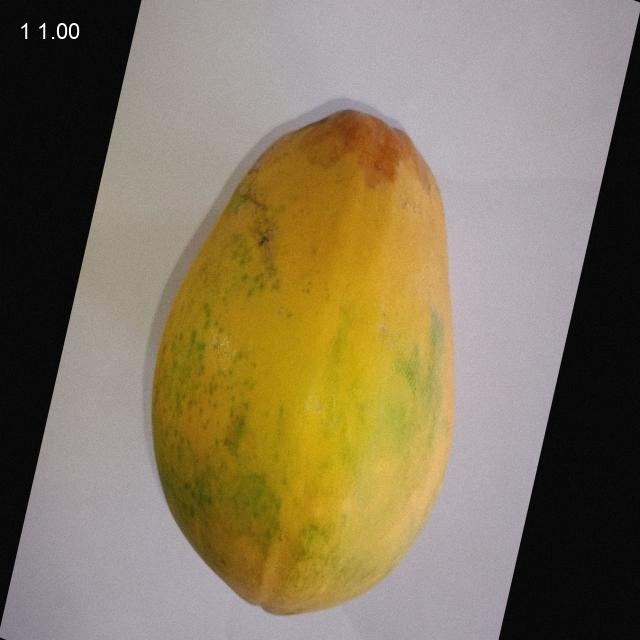

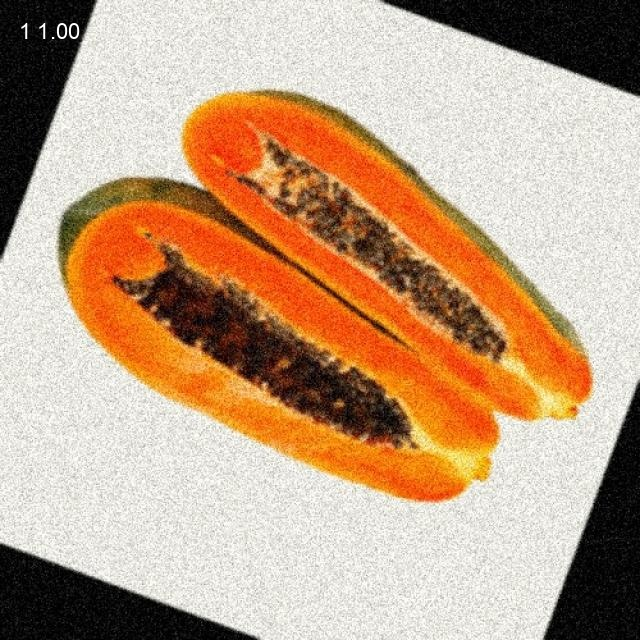

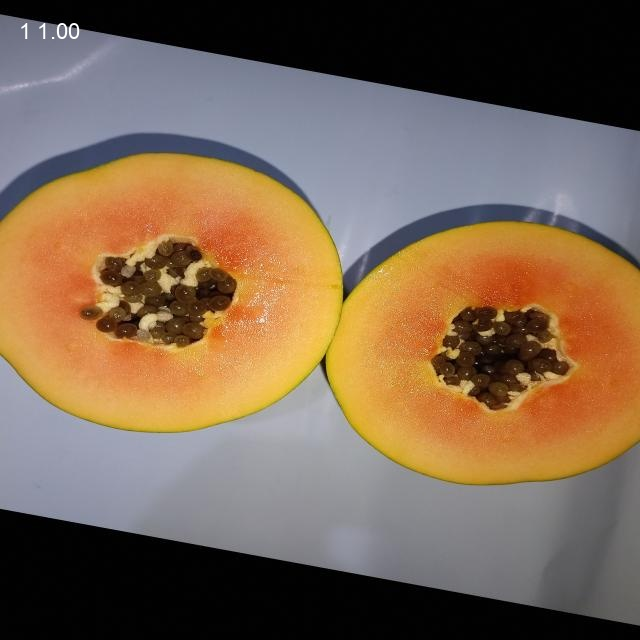

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/classify/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")